In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import celltypist

In [2]:
import session_info
session_info.show()

In [3]:
sc.settings.set_figure_params(dpi=80)

# Variables

In [4]:
sample_id = 'C194-HEA-0-FFPE-1'
path_adata = f'/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium/{sample_id}_5K_filtered_raw.h5ad'
celltypist_model_dir = '/rfs/project/rfs-iCNyzSAaucw/kk837/notebooks/Foetal/Xenium/5K/celltypist_models'

In [5]:
os.getcwd()

'/rfs/project/rfs-iCNyzSAaucw/kk837/notebooks/Foetal/Xenium/5K/C194-HEA-0-FFPE-1'

# Read in data

In [6]:
adata = sc.read_h5ad(path_adata)
adata

AnnData object with n_obs × n_vars = 144916 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

# Normalise the counts

In [7]:
sc.pp.filter_genes(adata, min_cells=3)

In [8]:
adata.shape

(144916, 5001)

In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [10]:
adata.X.data[:5]

array([4.2093534, 2.6576407, 2.6576407, 3.3151019, 3.3151019],
      dtype=float32)

# CellTypist prediction: coarse-grain

In [11]:
# coarse-grained
predictions_b2c = celltypist.annotate(adata, 
                                  model = f'{celltypist_model_dir}/global2coarse.pkl', 
                                  majority_voting = False)

# add to anndata
adata = predictions_b2c.to_adata(insert_labels = True, insert_conf = True)
adata.obs.rename(columns={'predicted_labels':'celltypist_coarse',
                              'conf_score':'conf_score_coarse'
                             },inplace=True)
adata.obs.head()

🔬 Input data has 144916 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4975 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,...,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_50_genes,pct_counts_in_top_150_genes,n_counts,n_genes,celltypist_coarse,conf_score_coarse
aaaafiob-1,aaaafiob-1,782.026245,1025.860474,754,0,0,0,0,0,754.0,...,6.236370,6.626718,8.620690,14.323607,26.525199,52.254642,754.0,510,Mesenchymal,1.000000
aaaajopp-1,aaaajopp-1,784.114746,1034.308350,145,0,0,0,0,0,145.0,...,4.795791,4.983607,20.689655,31.034483,51.724138,100.000000,145.0,120,Mesenchymal,0.984870
aaaanald-1,aaaanald-1,791.200500,1028.298462,569,0,0,0,0,0,569.0,...,5.913503,6.345636,17.223199,23.374341,35.852373,61.511424,569.0,369,Mesenchymal,1.000000
aaabdjka-1,aaabdjka-1,819.555664,1032.847168,659,0,0,0,1,0,659.0,...,6.109248,6.492240,10.318665,16.691958,28.831563,54.628225,659.0,449,Mesenchymal,1.000000
aaabglmg-1,aaabglmg-1,819.384583,1007.732910,83,0,0,0,0,0,83.0,...,4.219508,4.430817,31.325301,43.373494,79.518072,100.000000,83.0,67,Mesenchymal,0.998274


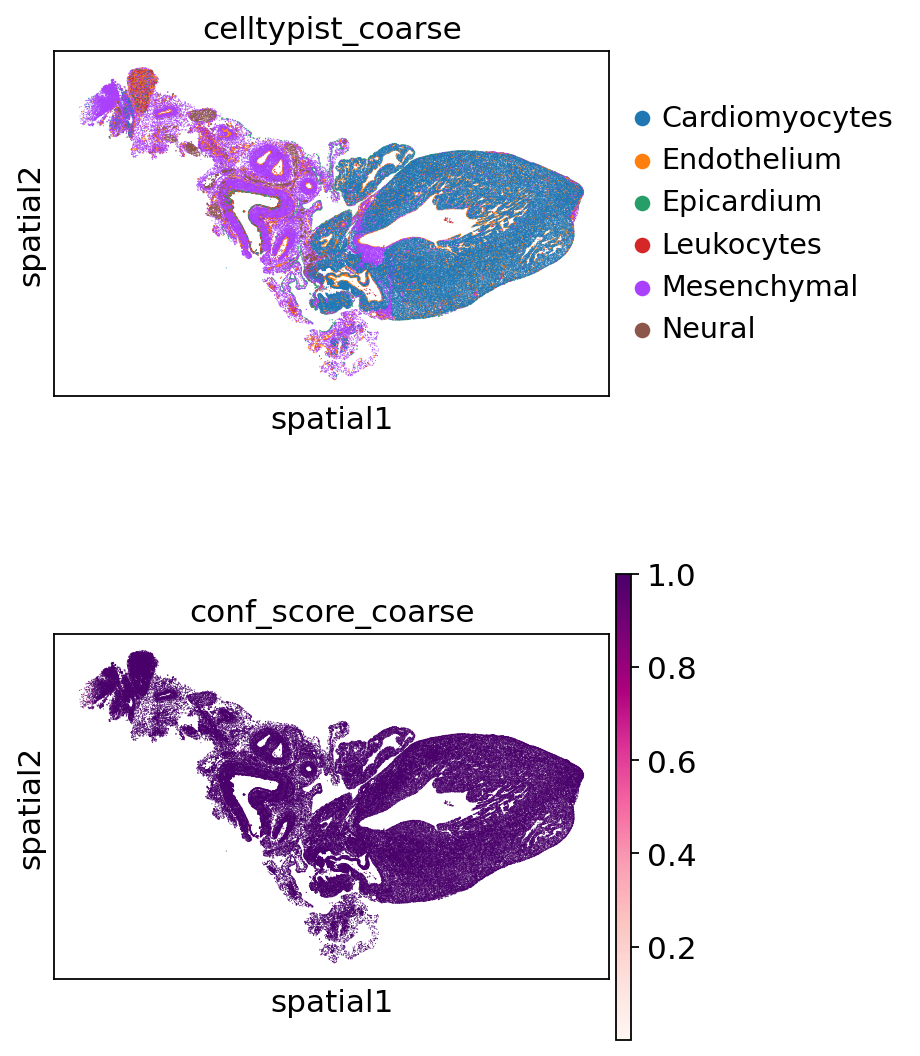

In [13]:
sc.pl.spatial(adata,color=['celltypist_coarse','conf_score_coarse'],cmap='RdPu',spot_size=20,vmax='p99',ncols=1)

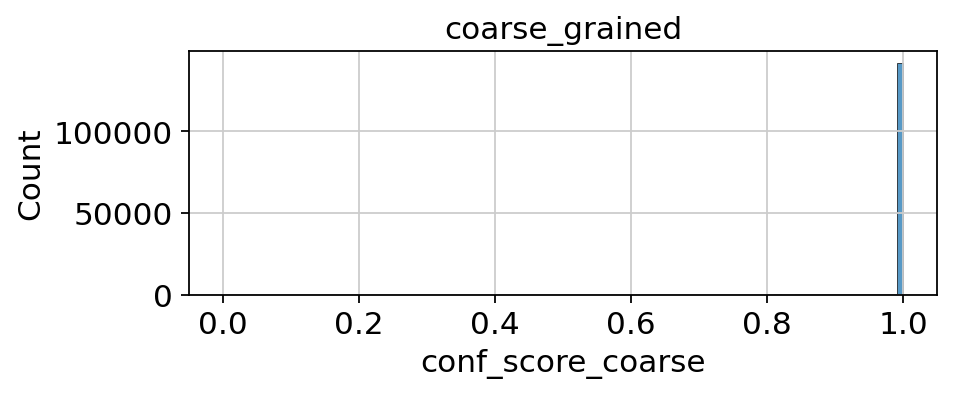

In [14]:
# celltypist confidence
plt.figure(figsize=(6, 2))
sns.histplot(adata.obs[f'conf_score_coarse'], kde=False, bins=100)
# plt.yscale('log')
plt.title('coarse_grained')
plt.show()

In [15]:
# check
conf_thresh = 0.5 # starting from relaxed threshold
pd.crosstab(adata.obs['celltypist_coarse'],adata.obs[f'conf_score_coarse']<conf_thresh)

conf_score_coarse,False,True
celltypist_coarse,,
Cardiomyocytes,73158,92
Endothelium,12863,77
Epicardium,3420,90
Leukocytes,4566,118
Mesenchymal,44487,165
Neural,5842,38


In [16]:
# finalised coarse-grained labels
conf_thresh = 0.5
adata.obs['celltypist_coarse_fin'] = adata.obs['celltypist_coarse'].astype('str').copy()
low_quality_cells = adata.obs_names[adata.obs[f'conf_score_coarse']<conf_thresh]
adata.obs.loc[low_quality_cells,'celltypist_coarse_fin'] = 'unassigned'
adata.obs['celltypist_coarse_fin'].value_counts()

celltypist_coarse_fin
Cardiomyocytes    73158
Mesenchymal       44487
Endothelium       12863
Neural             5842
Leukocytes         4566
Epicardium         3420
unassigned          580
Name: count, dtype: int64

... storing 'celltypist_coarse_fin' as categorical


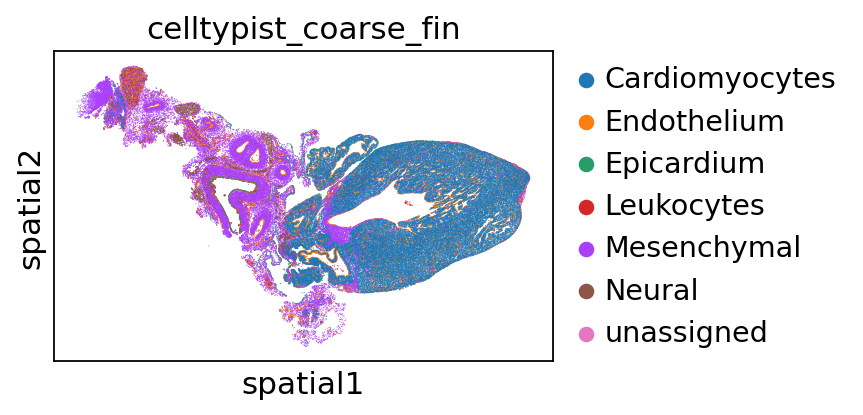

In [17]:
sc.pl.spatial(adata,color=['celltypist_coarse_fin'],cmap='RdPu',spot_size=20,vmax='p99',ncols=1)

# CellTypist prediction: mid-grain

In [18]:
adata.obs['celltypist_coarse2midmod'] = np.nan
adata.obs['conf_score_coarse2midmod'] = np.nan

for celltype in adata.obs['celltypist_coarse_fin'].unique():
    if celltype not in ['unassigned', 'Epicardium']: # 'Epicardium' is also 'Epicardium' in mid-grained
        print(celltype)
        # subset
        adata_sub = adata[adata.obs['celltypist_coarse_fin']==celltype]
        # predict
        predictions = celltypist.annotate(adata_sub, 
                                      model = f'{celltypist_model_dir}/coarse2midmod_{celltype}.pkl', 
                                      majority_voting = False)
        # add to anndata
        adata_sub = predictions.to_adata(insert_labels = True, insert_conf = True)
        adata.obs.loc[adata_sub.obs_names,'celltypist_coarse2midmod'] = adata_sub.obs['predicted_labels']
        adata.obs.loc[adata_sub.obs_names,'conf_score_coarse2midmod'] = adata_sub.obs['conf_score']
        print('')

🔬 Input data has 44487 cells and 5001 genes
🔗 Matching reference genes in the model


Mesenchymal


🧬 4958 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 5842 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4802 features used for prediction



Neural


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!



Cardiomyocytes


🔬 Input data has 73158 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4867 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 4566 cells and 5001 genes
🔗 Matching reference genes in the model



Leukocytes


🧬 4947 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 12863 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4916 features used for prediction



Endothelium


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


... storing 'celltypist_coarse2midmod' as categorical


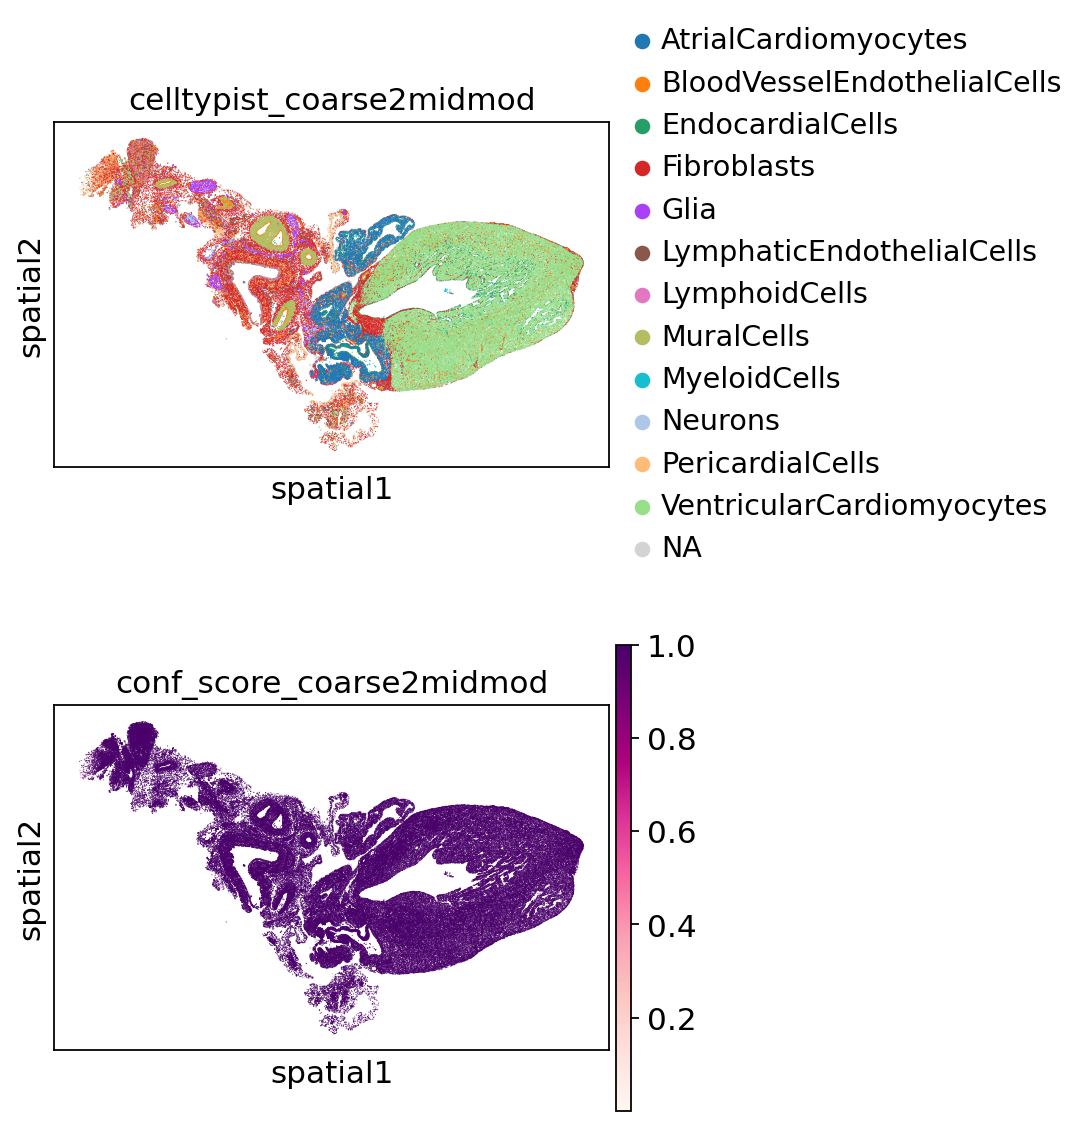

In [19]:
sc.pl.spatial(adata,color=['celltypist_coarse2midmod','conf_score_coarse2midmod'],
              cmap='RdPu',spot_size=20,vmax='p99',ncols=1)

In [20]:
# check
conf_thresh = 0.8
pd.crosstab(adata.obs['celltypist_coarse2midmod'],adata.obs[f'conf_score_coarse2midmod']<conf_thresh)

conf_score_coarse2midmod,False,True
celltypist_coarse2midmod,,
AtrialCardiomyocytes,15042,182
BloodVesselEndothelialCells,7183,106
EndocardialCells,3158,85
Fibroblasts,28224,1431
Glia,4142,66
LymphaticEndothelialCells,2287,44
LymphoidCells,2727,99
MuralCells,7747,523
MyeloidCells,1626,114


In [21]:
# finalised mid-grained labels
conf_thresh = 0.8
adata.obs['celltypist_mid_fin'] = adata.obs['celltypist_coarse_fin'].astype('str').copy()
adata.obs.replace({'celltypist_mid_fin':{'Epicardium':'EpicardialCells'}},inplace=True)
passed = adata.obs_names[adata.obs['conf_score_coarse2midmod']>=conf_thresh]
low_quality_cells = adata.obs_names[adata.obs[f'conf_score_coarse2midmod']<conf_thresh]

adata.obs.loc[passed,'celltypist_mid_fin'] = adata.obs.loc[passed,'celltypist_coarse2midmod'].copy()
adata.obs.loc[low_quality_cells,'celltypist_mid_fin'] = 'unassigned'
adata.obs['celltypist_mid_fin'].value_counts()

celltypist_mid_fin
VentricularCardiomyocytes      57761
Fibroblasts                    28224
AtrialCardiomyocytes           15042
MuralCells                      7747
BloodVesselEndothelialCells     7183
PericardialCells                5402
unassigned                      4630
Glia                            4142
EpicardialCells                 3420
EndocardialCells                3158
LymphoidCells                   2727
LymphaticEndothelialCells       2287
MyeloidCells                    1626
Neurons                         1567
Name: count, dtype: int64

... storing 'celltypist_mid_fin' as categorical


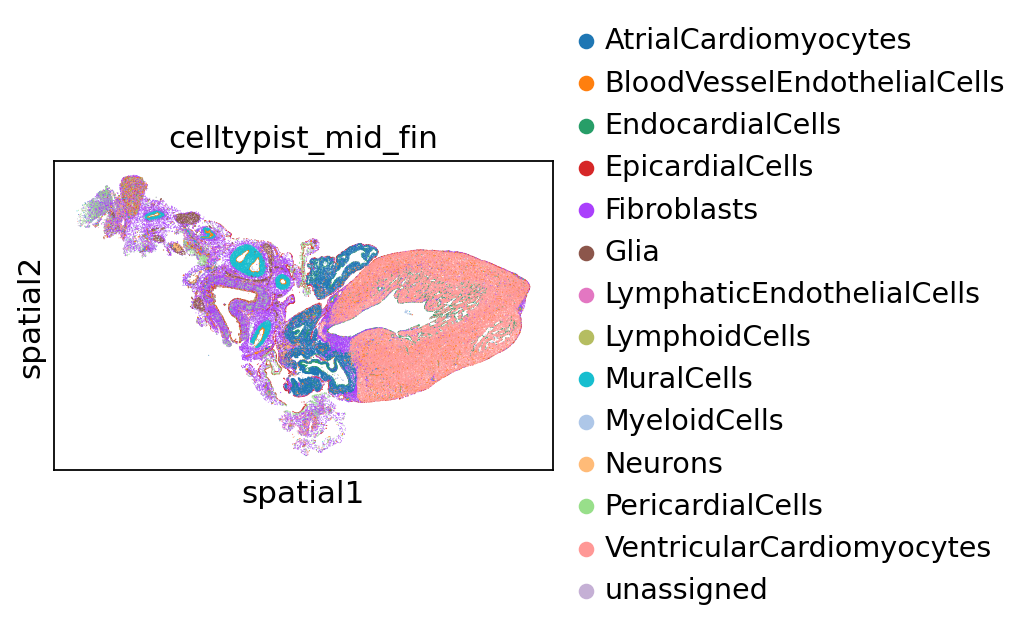

In [22]:
sc.pl.spatial(adata,color=['celltypist_mid_fin'],
              cmap='RdPu',spot_size=20,vmax='p99',ncols=1)

# celltypist prediction: fine-grain

In [23]:
adata.obs['celltypist_midmod2fine'] = np.nan
adata.obs['conf_score_midmod2fine'] = np.nan

for celltype in adata.obs['celltypist_mid_fin'].unique():
    if celltype not in ['unassigned', 'LymphaticEndothelialCells']: # 'LymphaticEndothelialCells' is also 'LymphaticEndothelialCells' in fine-grained
        print(celltype)
        # subset
        adata_sub = adata[adata.obs['celltypist_mid_fin']==celltype]
        # predict
        predictions = celltypist.annotate(adata_sub, 
                                      model = f'{celltypist_model_dir}/midmod2fine_{celltype}.pkl', 
                                      majority_voting = False)
        # add to anndata
        adata_sub = predictions.to_adata(insert_labels = True, insert_conf = True)
        adata.obs.loc[adata_sub.obs_names,'celltypist_midmod2fine'] = adata_sub.obs['predicted_labels']
        adata.obs.loc[adata_sub.obs_names,'conf_score_midmod2fine'] = adata_sub.obs['conf_score']
        print('')

🔬 Input data has 28224 cells and 5001 genes
🔗 Matching reference genes in the model


Fibroblasts


🧬 4923 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 5402 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4811 features used for prediction



PericardialCells


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 7747 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4846 features used for prediction



MuralCells


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 4142 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4706 features used for prediction



Glia


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 1567 cells and 5001 genes
🔗 Matching reference genes in the model



Neurons


🧬 4674 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!



VentricularCardiomyocytes


🔬 Input data has 57761 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4822 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 1626 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4875 features used for prediction



MyeloidCells


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 2727 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4889 features used for prediction



LymphoidCells


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 7183 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4833 features used for prediction



BloodVesselEndothelialCells


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 15042 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4709 features used for prediction



AtrialCardiomyocytes


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 3158 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4675 features used for prediction



EndocardialCells


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🔬 Input data has 3420 cells and 5001 genes
🔗 Matching reference genes in the model
🧬 4829 features used for prediction



EpicardialCells


⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


... storing 'celltypist_midmod2fine' as categorical


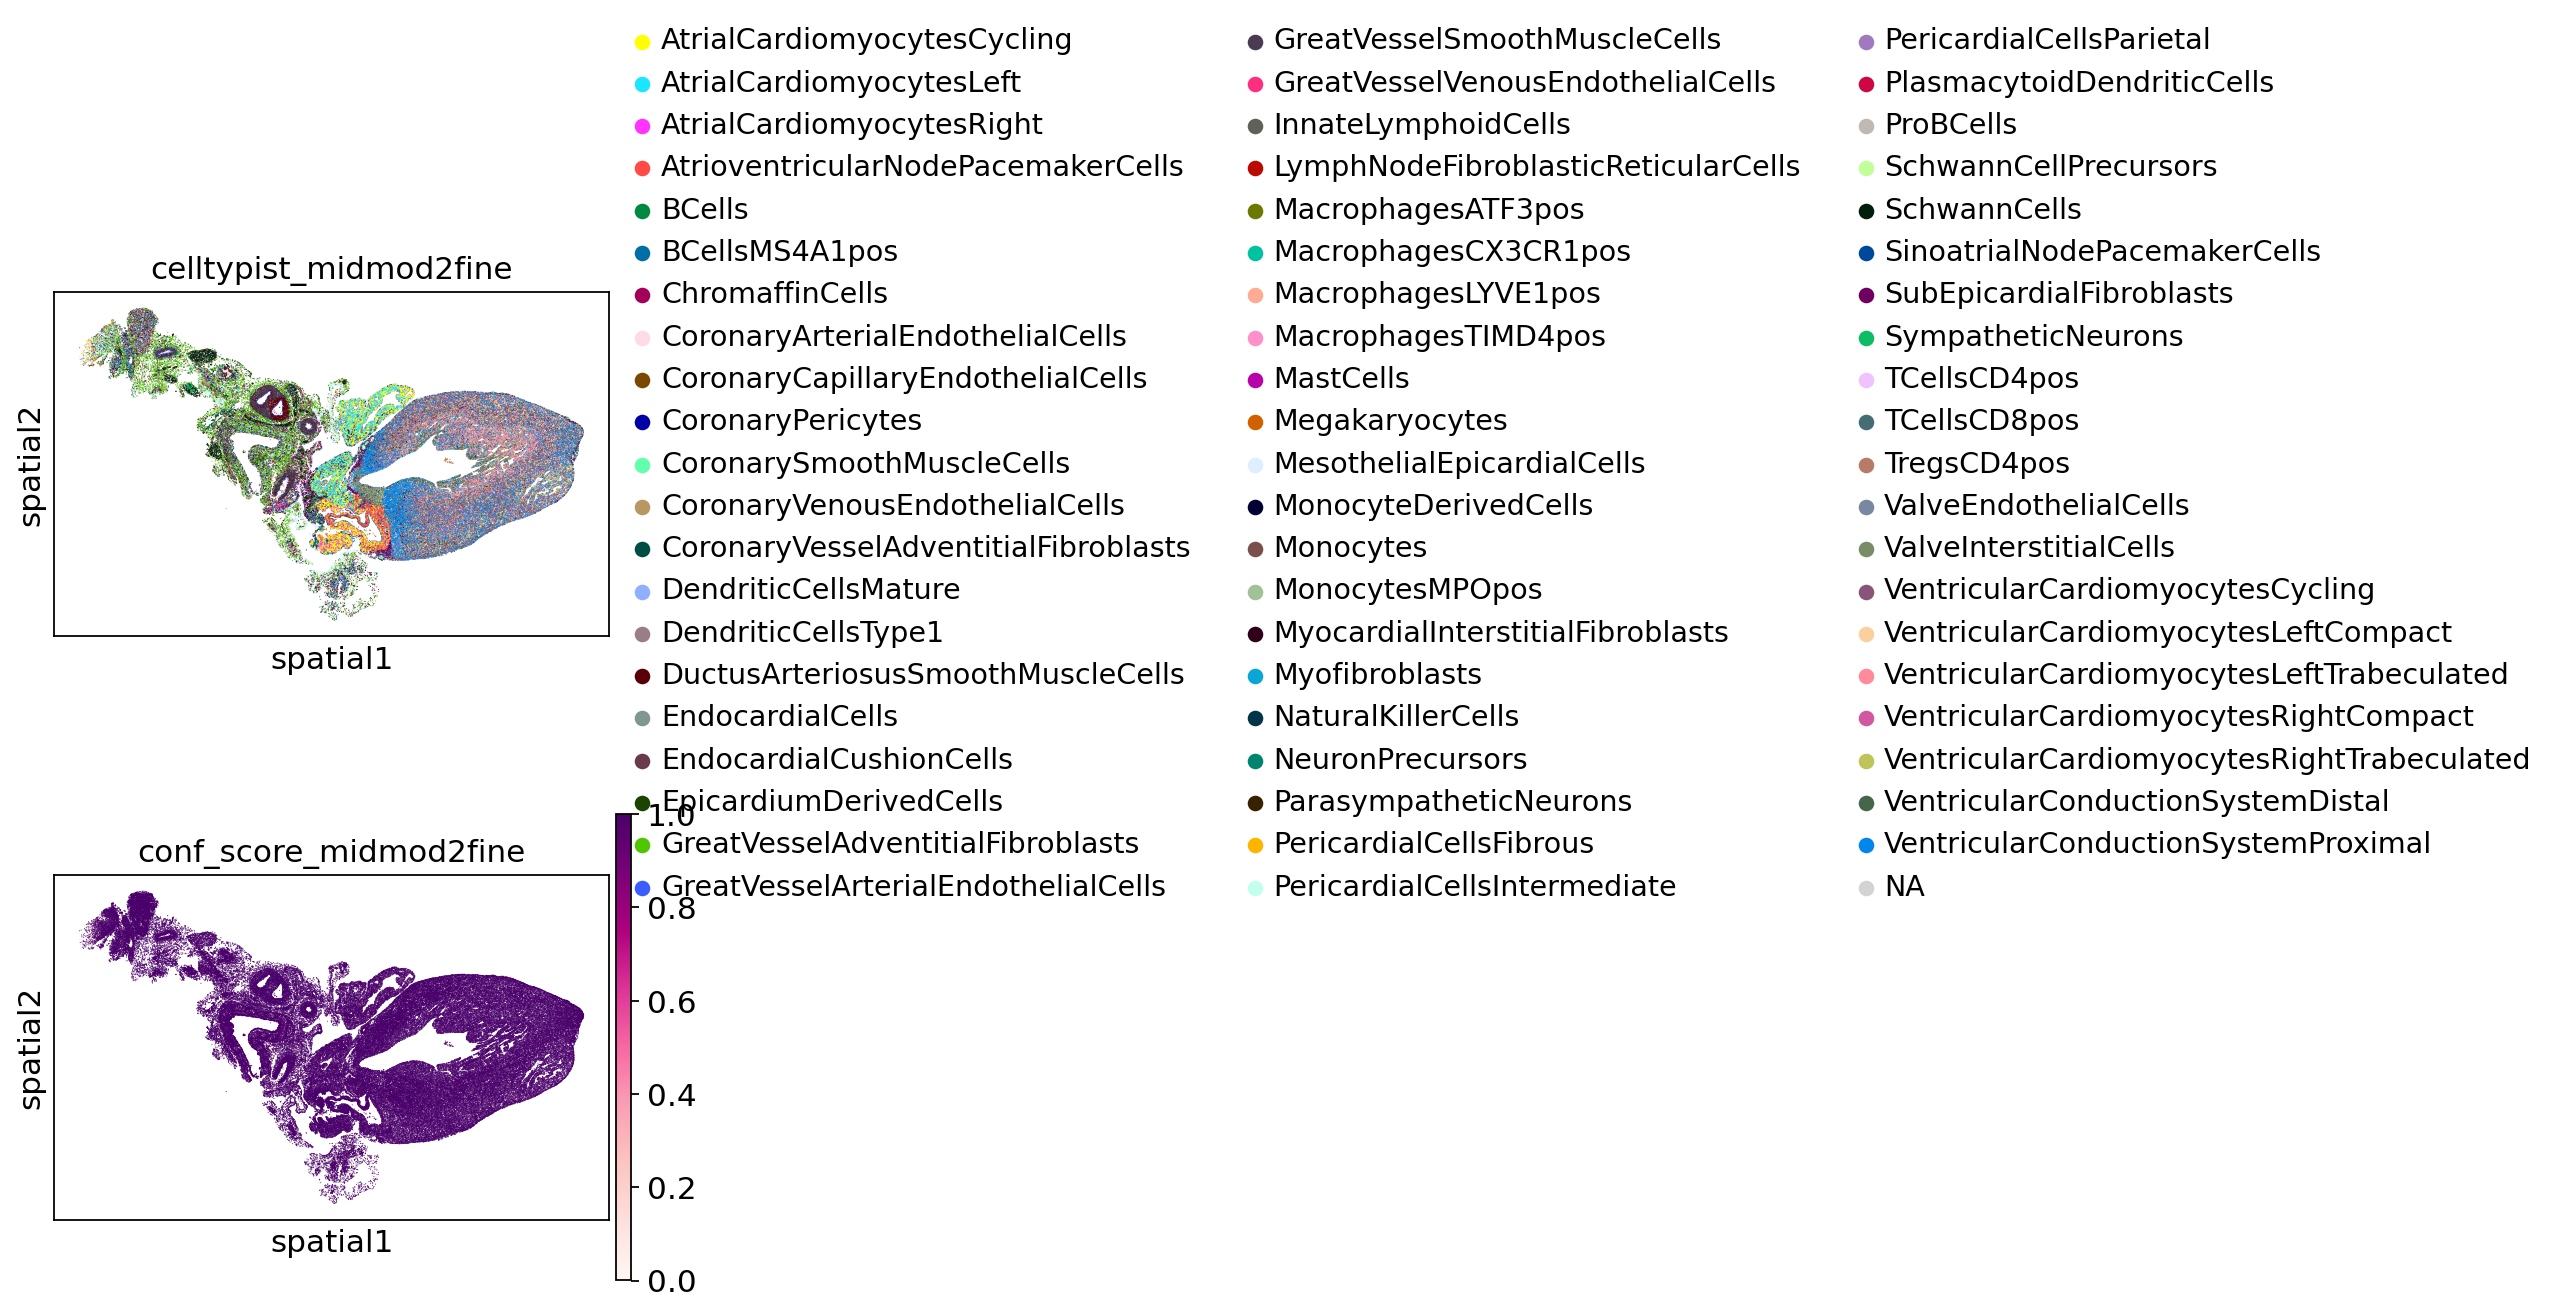

In [24]:
sc.pl.spatial(adata,color=['celltypist_midmod2fine','conf_score_midmod2fine'],
              cmap='RdPu',spot_size=20,vmax='p99',ncols=1)

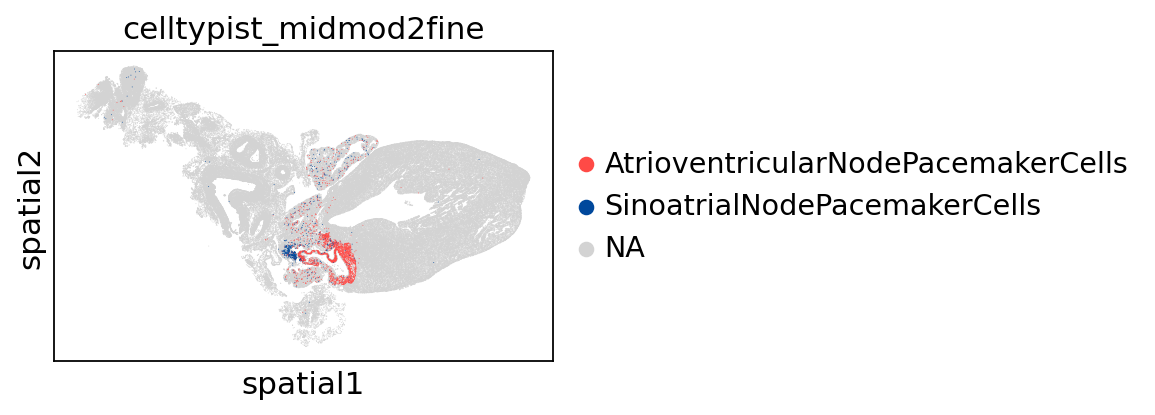

In [25]:
sc.pl.spatial(adata,color=['celltypist_midmod2fine'],
              groups=['SinoatrialNodePacemakerCells','AtrioventricularNodePacemakerCells'],
              cmap='RdPu',spot_size=20,vmax='p99',ncols=3)

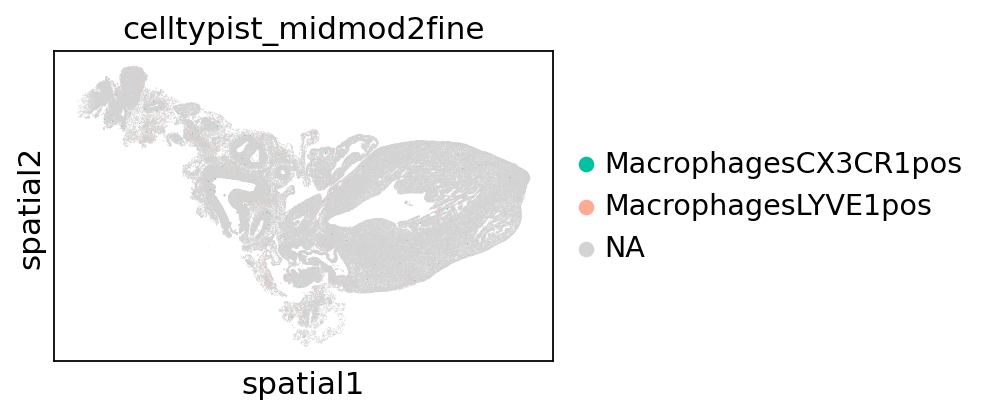

In [26]:
sc.pl.spatial(adata,color=['celltypist_midmod2fine'],
              groups=['MacrophagesCX3CR1pos','MacrophagesLYVE1pos'],
              cmap='RdPu',spot_size=20,vmax='p99',ncols=3)

# Save

In [27]:
adata.write(f'/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium/{sample_id}_5K_filtered_lognorm.h5ad')

In [28]:
print(f'/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium/{sample_id}_5K_filtered_lognorm.h5ad')

/home/kk837/rds/rds-teichlab-C9woKbOCf2Y/kk837/Foetal/anndata_objects/Xenium/C194-HEA-0-FFPE-1_5K_filtered_lognorm.h5ad
